## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data =pd.read_csv('aug_train.csv')
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Data Visualization

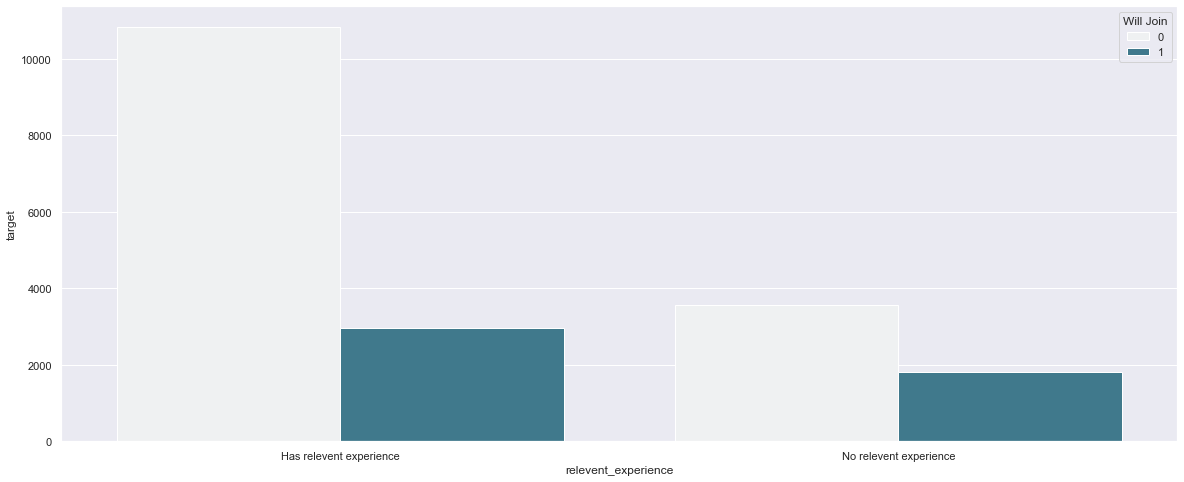

<Figure size 1440x576 with 0 Axes>

In [2]:
join = data[data['target'] == 1].groupby(['relevent_experience']).agg({'target': 'count'})
wont = data[data['target'] == 0].groupby(['relevent_experience']).agg({'target': 'count'})


join['Will Join'] = 1
wont['Will Join'] = 0
res=pd.concat([join,wont])
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x = res.index,y='target',data=res,hue='Will Join', color=(0.2, 0.5, 0.6, 0.6))

plt.figure();
plt.show()



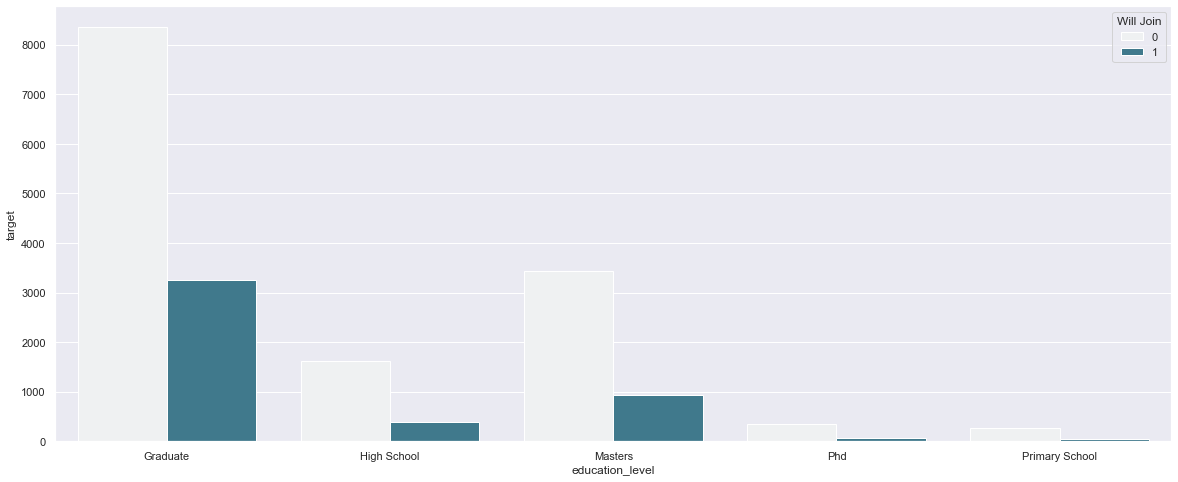

In [3]:
join = data[data['target'] == 1].groupby(['education_level']).agg({'target': 'count'})
wont = data[data['target'] == 0].groupby(['education_level']).agg({'target': 'count'})

plt.figure();


join['Will Join'] = 1
wont['Will Join'] = 0
res=pd.concat([join,wont])
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x = res.index,y='target',data=res,hue='Will Join', color=(0.2, 0.5, 0.6, 0.6))


plt.show()



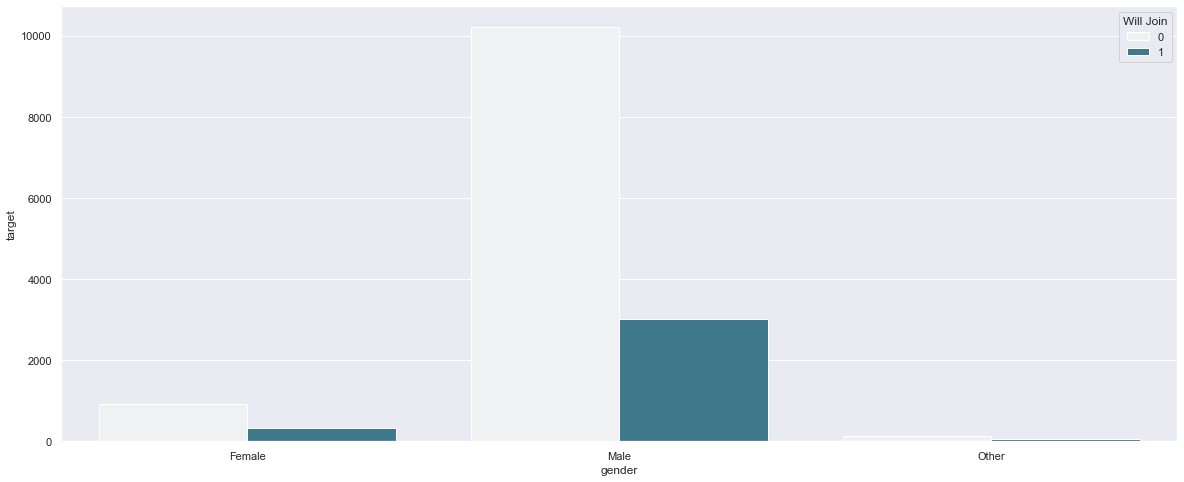

In [4]:
join = data[data['target'] == 1].groupby(['gender']).agg({'target': 'count'})
wont = data[data['target'] == 0].groupby(['gender']).agg({'target': 'count'})

plt.figure();


join['Will Join'] = 1
wont['Will Join'] = 0
res=pd.concat([join,wont])
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x = res.index,y='target',data=res,hue='Will Join', color=(0.2, 0.5, 0.6, 0.6))


plt.show()



In [5]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [6]:
# studying null values
data.isnull().sum( )


enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
#convert string to float
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_values = list(data.select_dtypes(include=['object']).columns.values)
for i in object_values:
    print(i)
    data[i].fillna('UNK', inplace=True)
    data[i] = le.fit_transform(data[i])

# convert all columns to one type (int)
enc = LabelEncoder()
for j in data.columns:
    data[j] = enc.fit_transform(data[j])

city
gender
relevent_experience
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job


In [8]:
data.dtypes

enrollee_id               int64
city                      int64
city_development_index    int64
gender                    int64
relevent_experience       int64
enrolled_university       int64
education_level           int64
major_discipline          int64
experience                int64
company_size              int64
company_type              int64
last_new_job              int64
training_hours            int64
target                    int64
dtype: object

In [9]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [10]:
data=data.set_index('enrollee_id')

In [11]:
data.to_csv('aug_train_preprocessed.csv') 

### Data Visulaization

In [12]:
data

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
5018,5,85,1,0,3,0,5,21,8,6,0,35,1
16986,77,48,1,1,3,0,5,6,4,5,4,46,0
6499,64,14,3,1,0,0,5,15,8,6,6,82,0
19067,14,52,3,1,2,0,1,20,8,5,6,51,1
358,50,45,1,0,3,2,5,21,4,1,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4117,55,71,1,1,3,0,2,5,8,6,0,41,1
17981,5,85,1,0,3,0,5,5,8,6,3,51,1
14021,5,85,1,0,3,0,5,21,4,5,3,43,0


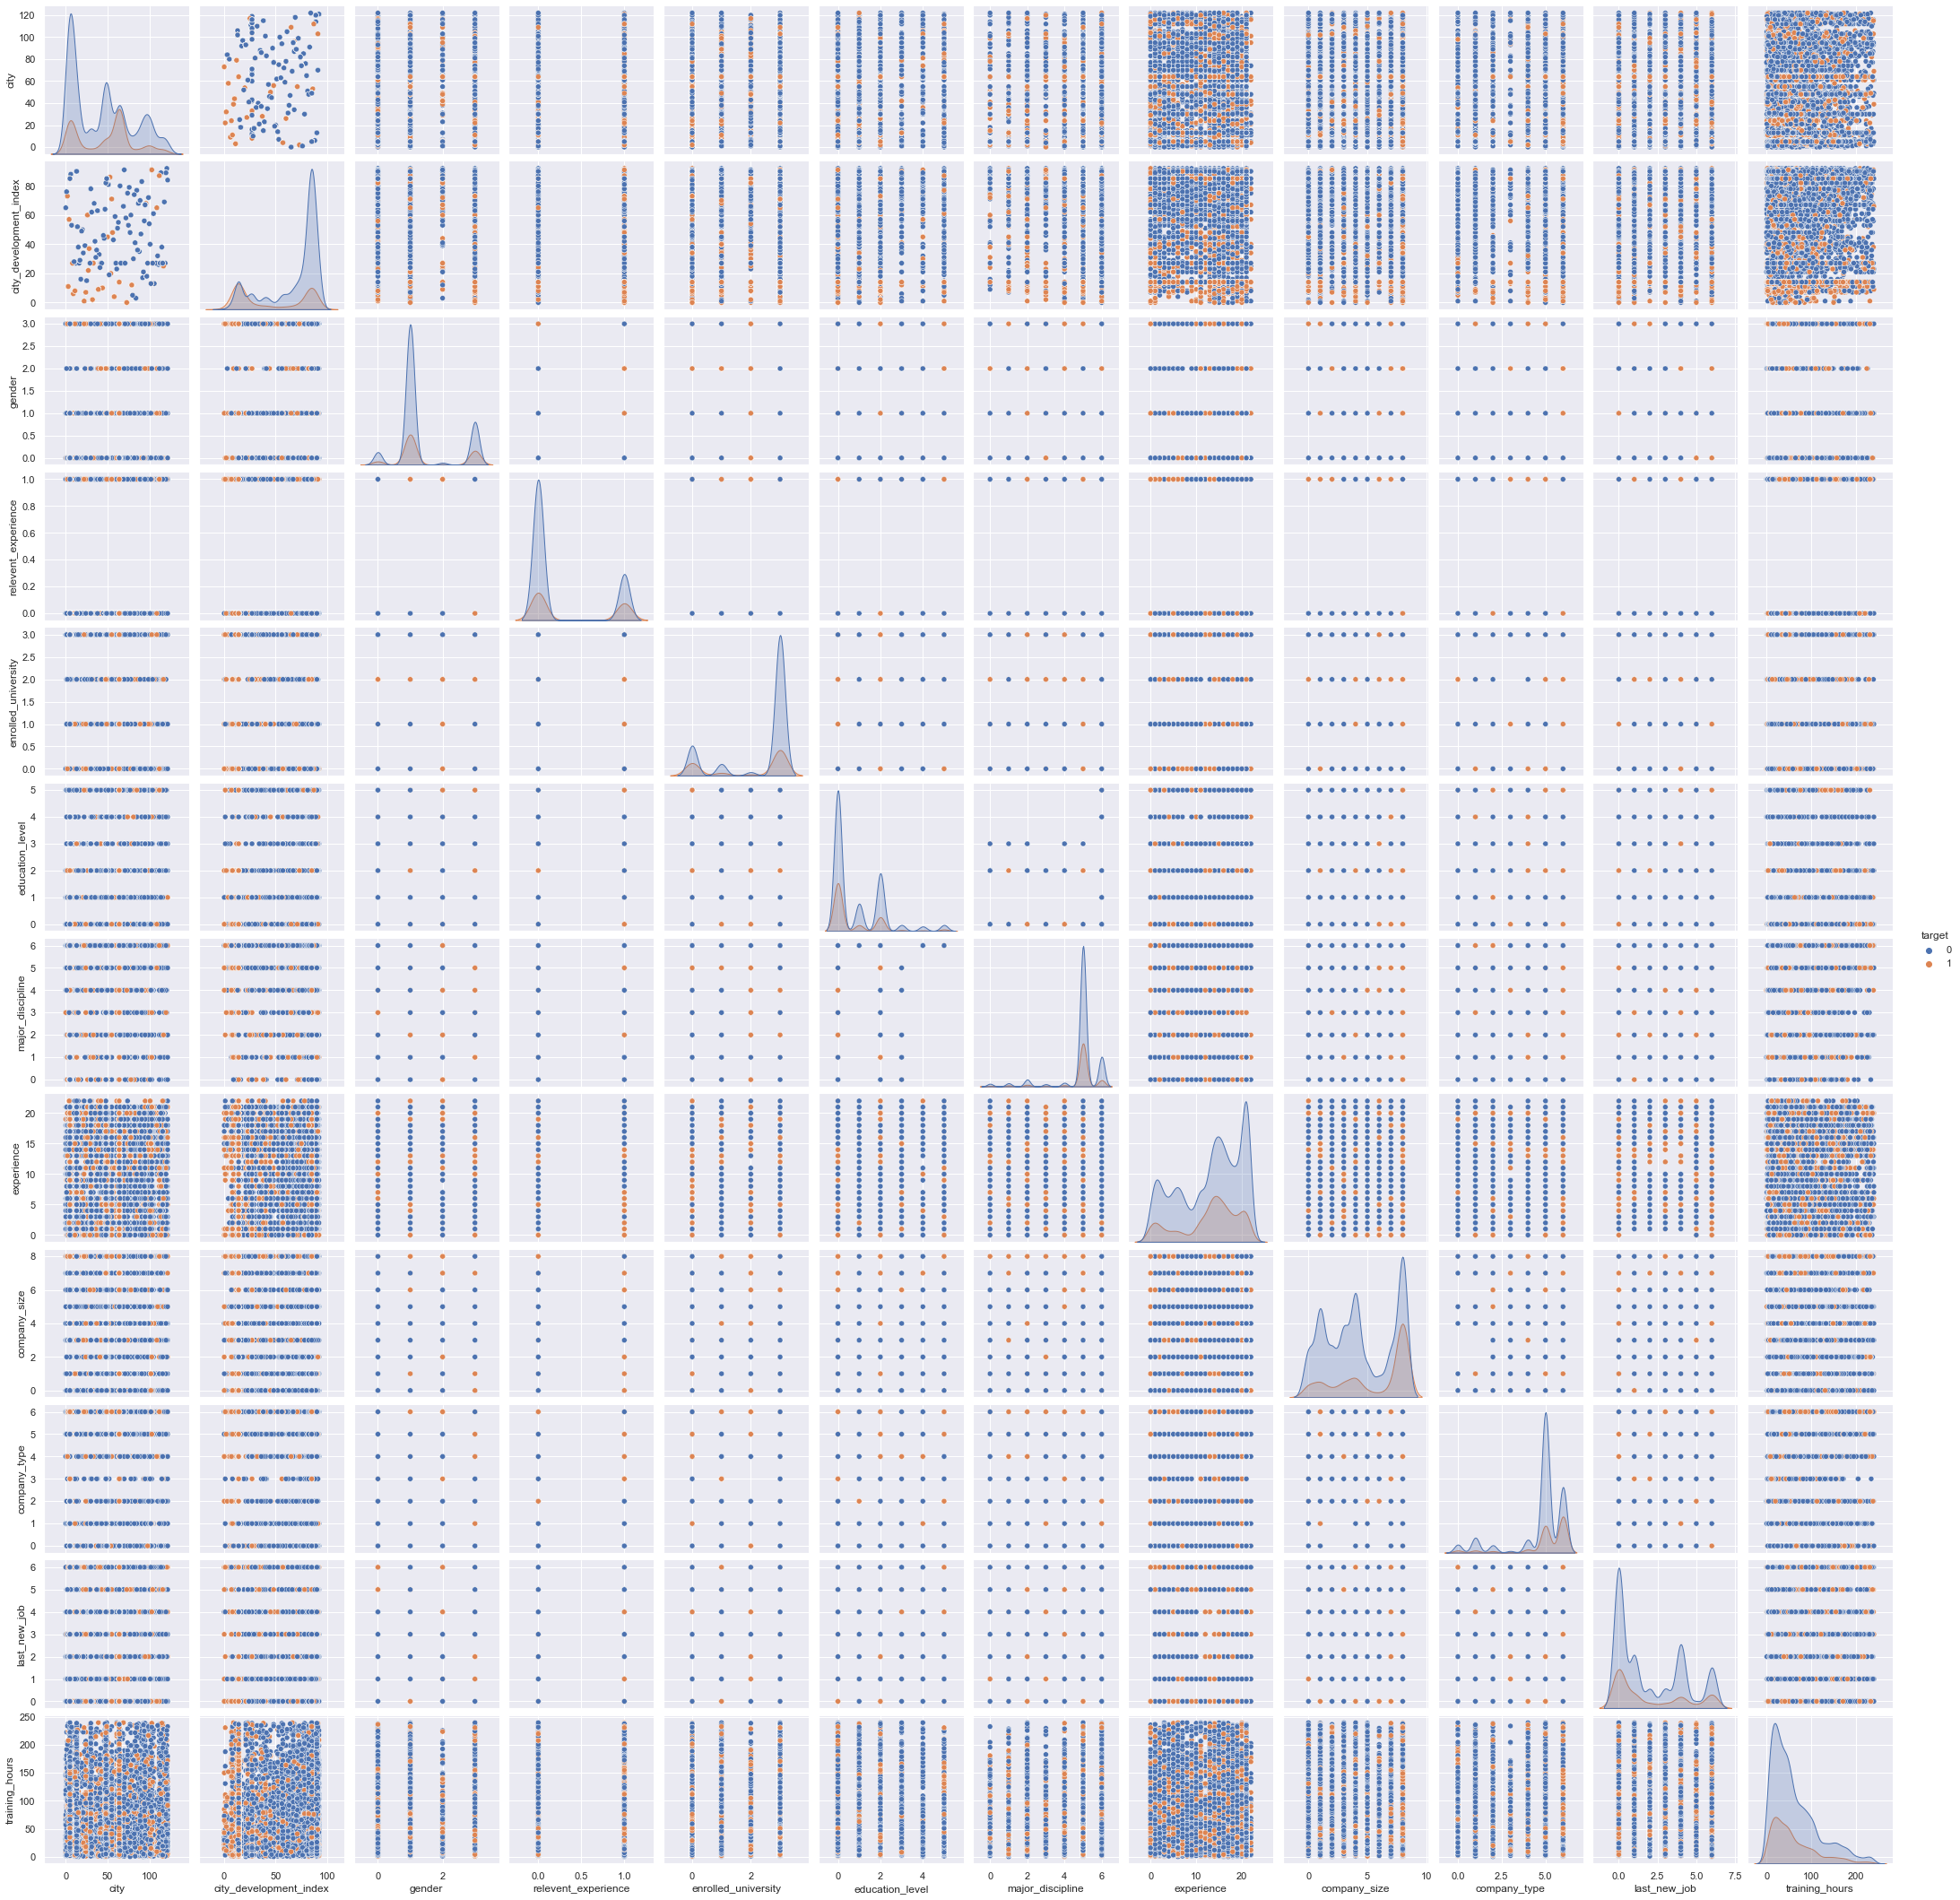

In [13]:
sns.pairplot(data, hue='target')

#### Normaliznig data

In [14]:
x=data.drop(columns='target')
y=data['target']

In [15]:
# normaliznig data
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

#### KNN

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,random_state=0)

In [17]:
import math
n=int(math.sqrt(x_train.shape[0]))
n

123

In [18]:
neighbors = np.arange(38,49)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    print("Accuracy of K=",k,"is",test_accuracy[i])

Accuracy of K= 38 is 0.7680062630480167
Accuracy of K= 39 is 0.7685281837160751
Accuracy of K= 40 is 0.7700939457202505
Accuracy of K= 41 is 0.7711377870563675
Accuracy of K= 42 is 0.7690501043841336
Accuracy of K= 43 is 0.7721816283924844
Accuracy of K= 44 is 0.7706158663883089
Accuracy of K= 45 is 0.7706158663883089
Accuracy of K= 46 is 0.7693110647181628
Accuracy of K= 47 is 0.7716597077244259
Accuracy of K= 48 is 0.7716597077244259


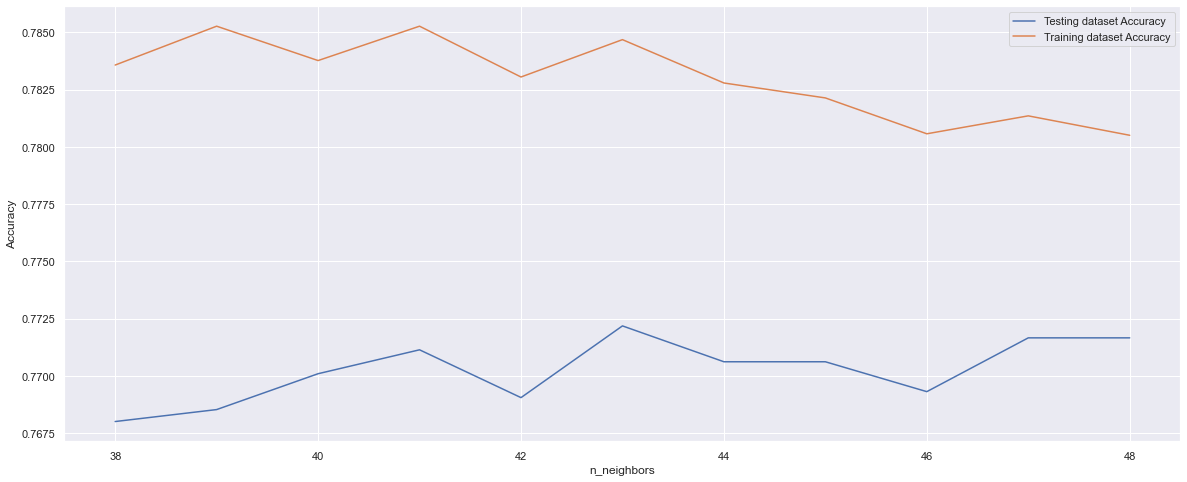

In [19]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [20]:
clf= KNeighborsClassifier(n_neighbors=45, metric='euclidean', p=2 )  
clf.fit(x_train, y_train)  

KNeighborsClassifier(metric='euclidean', n_neighbors=45)

In [21]:
from sklearn.metrics import accuracy_score, precision_score,recall_score

y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy:",acc)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Model Precision:",precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Model Recall:",recall_score(y_test, y_pred))

accuracy: 0.7706158663883089
Model Precision: 0.5641952983725136
Model Recall: 0.32842105263157895


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2882
           1       0.56      0.33      0.42       950

    accuracy                           0.77      3832
   macro avg       0.68      0.62      0.64      3832
weighted avg       0.75      0.77      0.75      3832



In [23]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix,ConfusionMatrixDisplay
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[2641,  241],
       [ 638,  312]])

<AxesSubplot:>

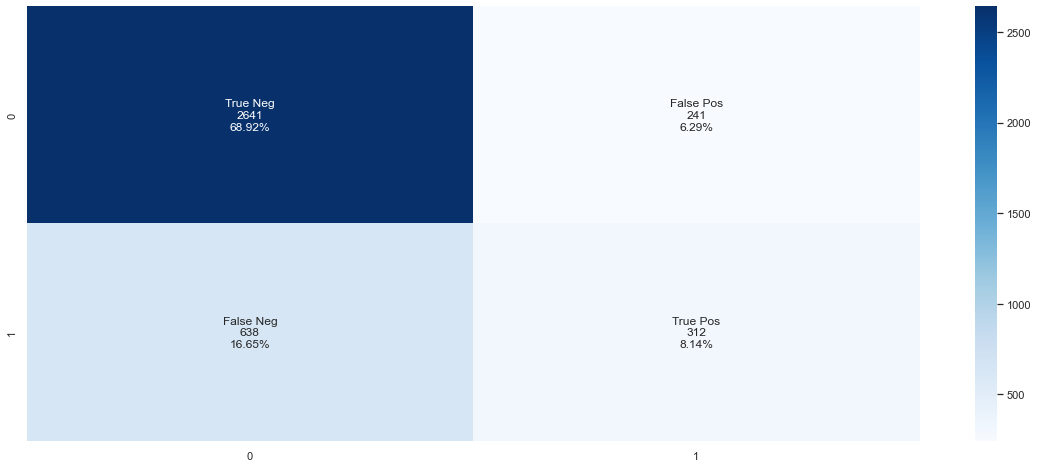

In [24]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### SVM

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,random_state=40)

In [26]:
# SVM
# "linear", "poly", "rbf"
from sklearn import svm
clf_rbf = svm.SVC(kernel='rbf',gamma=0.1,C=1.0).fit(x_train,y_train)
clf_poly= svm.SVC(kernel='poly', degree=3, C=1.0).fit(x_train,y_train)
clf_lin= svm.SVC(kernel='linear', C=1.0).fit(x_train,y_train)
#clf.fit(x_train,y_train)

In [27]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score,recall_score

#y_pred = clf.predict(x_test)
y_pred_rbf= clf_rbf.predict(x_test)
y_pred_poly= clf_poly.predict(x_test)
y_pred_lin= clf_lin.predict(x_test)

In [28]:
print("RBF ACC=", accuracy_score(y_test, y_pred_rbf))
print("LINEAR ACC=", accuracy_score(y_test, y_pred_lin))
print("POLY ACC=", accuracy_score(y_test, y_pred_poly))

RBF ACC= 0.7776617954070981
LINEAR ACC= 0.7528705636743215
POLY ACC= 0.7771398747390397


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2885
           1       0.56      0.44      0.49       947

    accuracy                           0.78      3832
   macro avg       0.70      0.66      0.68      3832
weighted avg       0.76      0.78      0.77      3832



In [30]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",precision_score(y_test, y_pred_poly))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(y_test, y_pred_poly))

Precision: 0.5644937586685159
Recall: 0.4297782470960929


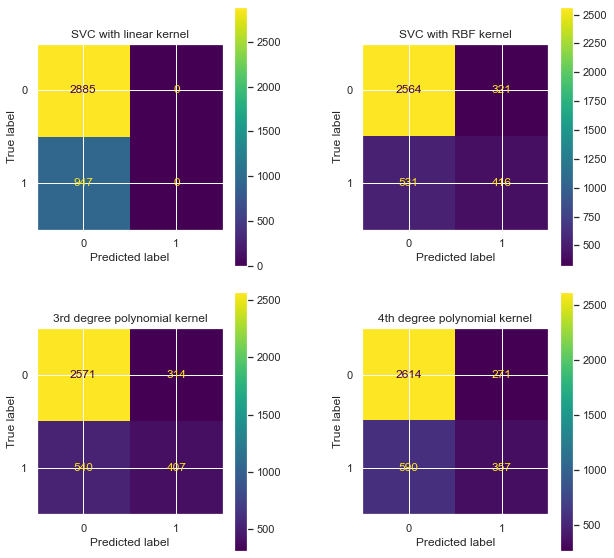

In [31]:
clf_poly4= svm.SVC(kernel='poly', degree=4, C=1.0).fit(x_train,y_train)
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          '3rd degree polynomial kernel',
          '4th degree polynomial kernel']


figure, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
for i, clf in enumerate((clf_lin, clf_rbf, clf_poly,clf_poly4)):
    plot_confusion_matrix(clf, x_test, y_test, ax = axes[i])
    axes[i].set_title(titles[i])
plt.subplots_adjust(wspace=0.40, hspace=0.1)
plt.show()

### Logistic Regression

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix , classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,random_state=0)

In [34]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred=model.predict(x_test)
y_pred


array([0, 0, 0, ..., 1, 0, 1])

In [36]:
print('Accuracy of Model: ', accuracy_score(y_test,y_pred)*100)

Accuracy of Model:  76.90501043841336


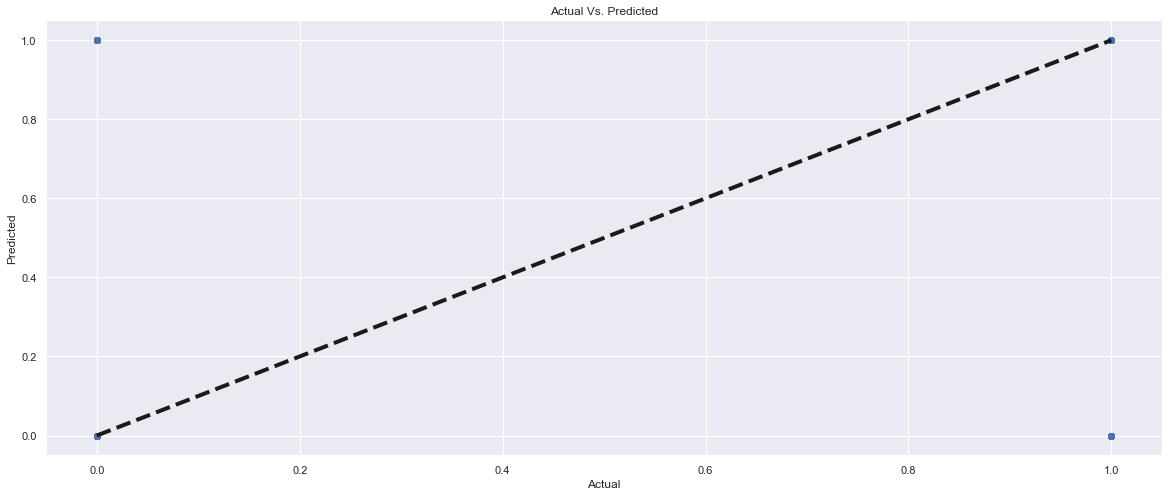

In [37]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Actual Vs. Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [38]:
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix

array([[2685,  197],
       [ 688,  262]])

<AxesSubplot:>

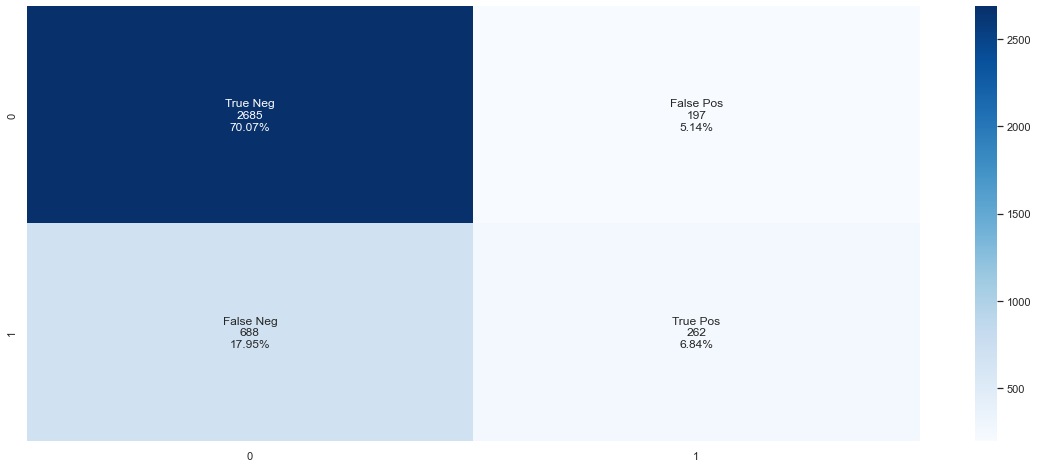

In [39]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2882
           1       0.57      0.28      0.37       950

    accuracy                           0.77      3832
   macro avg       0.68      0.60      0.62      3832
weighted avg       0.74      0.77      0.74      3832



In [41]:
#print("Precision:",precision_score(y_test, y_pred)*100)

#print("Recall:",recall_score(y_test, y_pred)*100)

### Naive Bayes

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,random_state=0)

In [43]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)

In [44]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix, classification_report

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.755741127348643
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      2882
           1       0.51      0.45      0.48       950

    accuracy                           0.76      3832
   macro avg       0.67      0.65      0.66      3832
weighted avg       0.75      0.76      0.75      3832



In [45]:
cf_matrix = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

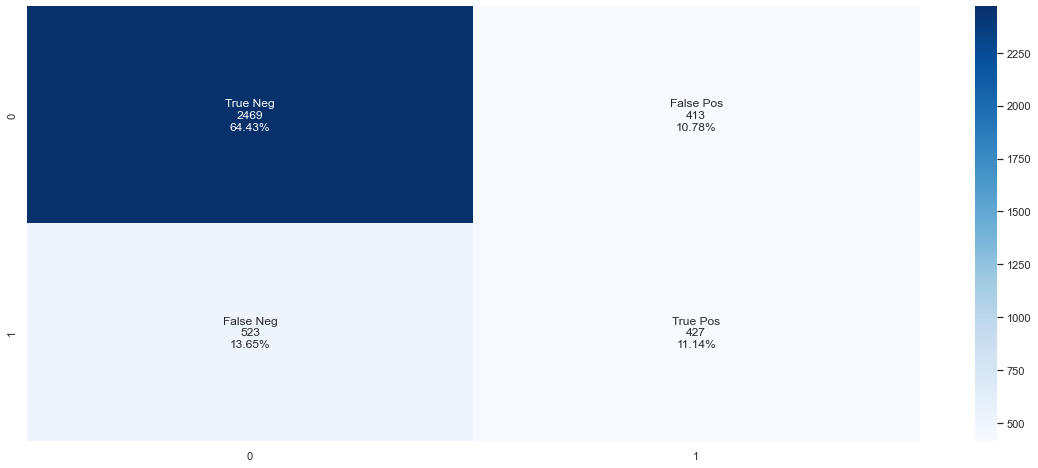

In [46]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

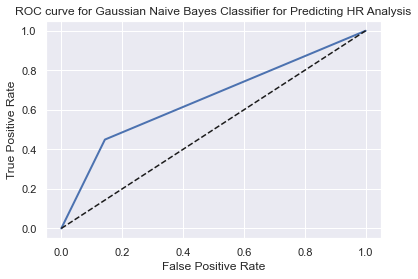

In [47]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting HR Analysis')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### LSTM

In [48]:
import numpy
from tensorflow import keras 
from tensorflow.keras.datasets import imdb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [49]:
def prepare_datasets(test_size, validation_size):

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [50]:
x.shape

(19158, 12)

In [51]:
x = np.reshape(x,(19158,12,1))

In [52]:
def build_model(inputshape):
    model = Sequential()

    model.add(keras.layers.LSTM(64,input_shape=inputshape, return_sequences=True))
    
    model.add(keras.layers.LSTM(64))
    model.add(keras.layers.Dense(64,activation='relu'))
    model.add(keras.layers.Dropout(rate=0.3))
    
   
    model.add(keras.layers.Dense(2,activation='softmax'))
   
    model.summary()
    return model

In [53]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
model = build_model(input_shape)

    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

#model.summary()

    # train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    #plot_history(history)

    # evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 54,210
Trainable params: 54,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
360/360 [==============================] - 7s 13ms/step - loss: 0.6285 - accuracy: 0.7320 - val_loss: 0.547

In [54]:
y_pred=model.predict(X_test)

In [55]:
y_pred

array([[0.8416702 , 0.1583298 ],
       [0.48851228, 0.5114878 ],
       [0.46460754, 0.5353925 ],
       ...,
       [0.78739816, 0.21260177],
       [0.68122494, 0.31877506],
       [0.8435338 , 0.15646625]], dtype=float32)

In [56]:
rounded_predictions=np.argmax(y_pred,axis=-1)

rounded_predictions

array([0, 1, 1, ..., 0, 0, 0])

In [57]:
cf_matrix = confusion_matrix(y_test, rounded_predictions)

<AxesSubplot:>

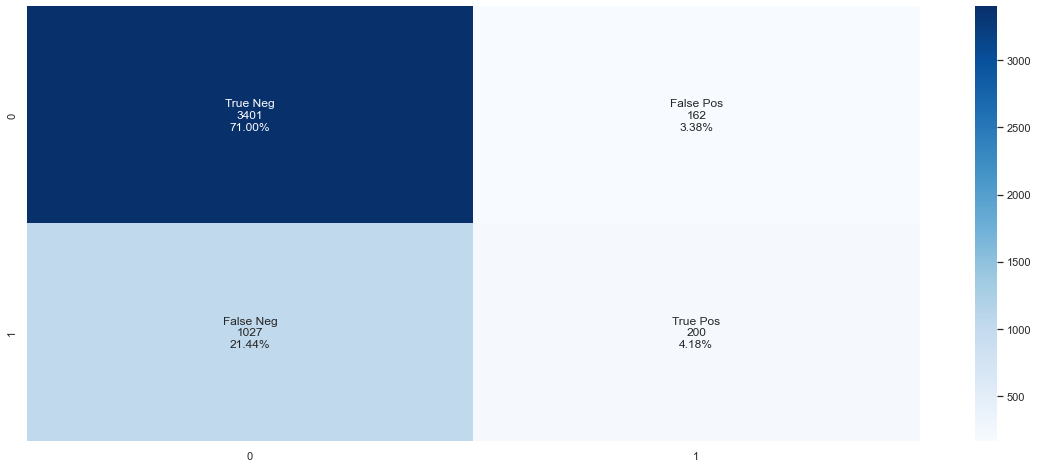

In [58]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [59]:
print(classification_report(y_test, rounded_predictions))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      3563
           1       0.55      0.16      0.25      1227

    accuracy                           0.75      4790
   macro avg       0.66      0.56      0.55      4790
weighted avg       0.71      0.75      0.70      4790

